2nd Technique
#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)


In [2]:
import pandas as pd

df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [12]:
def medianAge(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [13]:
median = df.Age.median()
median

28.0

In [14]:
medianAge(df,'Age',median)

In [15]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [16]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

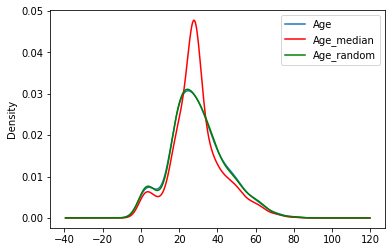

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


#### Advantages

    1.Easy To implement
    2.There is less distortion in variance

#### Disadvantage

    1.Every situation randomness wont work



3rd Technique
#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random


In [21]:
df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
import numpy as np
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0



#### Advantages

    Easy to implement
    Captures the importance of missing values

##### Disadvantages

    Creating Additional Features(Curse of Dimensionality)
    
    
    
4th technique
### End of Distribution imputation

In [23]:
df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


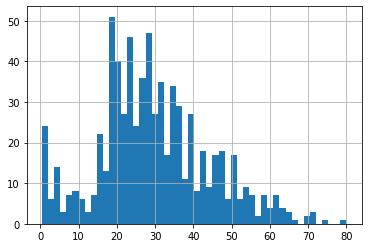

In [25]:
df.Age.hist(bins=50)

In [26]:
import seaborn as sns


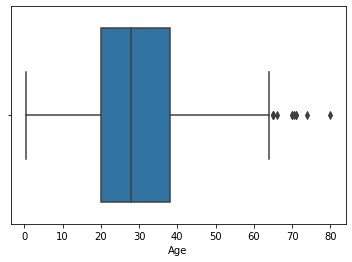

In [29]:
sns.boxplot(x='Age',data= df)

In [36]:


extreme=df.Age.mean()+3*df.Age.std()


extreme

TypeError: unsupported operand type(s) for +: 'float' and 'function'

In [33]:
def median(df,variable,median,extreme):
    df[variable+"_end_distri"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [34]:
median(df,'Age',median,extreme)
df.head()

,Survived,Age,Fare,Age_end_distri
0,0,22,7.2500,22.0
1,1,38,71.2833,38.0
2,1,26,7.9250,26.0
3,1,35,53.1000,35.0
4,0,35,8.0500,35.0


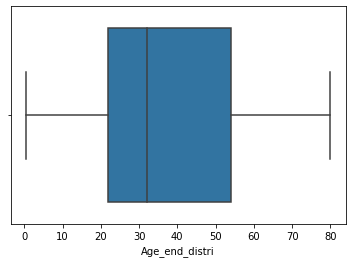

In [37]:
sns.boxplot('Age_end_distri',data=df)